# Import Packages


In [123]:
import cv2 
import os
import sys
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import PIL
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# Load data & preprocessing

In [124]:
# Lets take a look at some images
path_img = os.path.join(os.pardir, "data", "raw", "train/")
files = os.listdir(path_img)
sample = np.random.choice(files)
path_sample = os.path.join(path_img+sample)


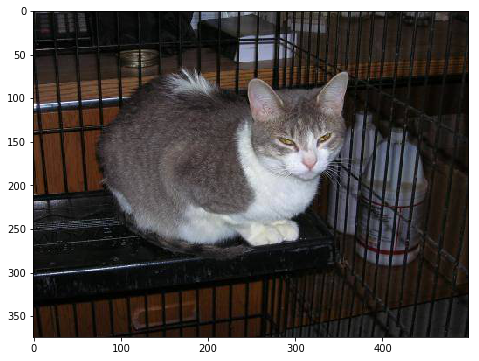

In [125]:
plt.figure(figsize=(8,6))
img = load_img(path_sample)
plt.imshow(img);

In [169]:
# Now load the preprocessed training and validation data 
proj_root = os.path.join(os.pardir)
path_data = os.path.join(proj_root, "data", "interim")

# Load training set
training_data = np.load(os.path.join(path_data,"training_data.npy"))
training_labels = np.load(os.path.join(path_data,"training_labels.npy"))
# Load validation set
validation_data = np.load(os.path.join(path_data, "validation_data.npy"))
validation_labels = np.load(os.path.join(path_data,"validation_labels.npy"))

In [170]:
# Reshape the data 
train_set = training_data.reshape((20000, 50*50))
validation_set = validation_data.reshape((5000, 50*50))

# Scale the data
data = train_set.astype('float32') / 255.0
validation = validation_set.astype('float32')/ 255.0

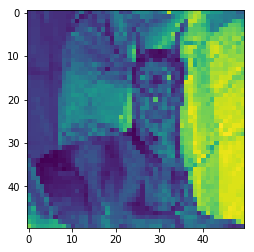

In [192]:
plt.imshow(training_data[np.random.randint(0,2000)]);

# Build model with Keras

In [193]:
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense

In [194]:
# We need to determine number of layers we need ! using Hyperparameter tuning 
# For now we adopt someone else's results
model = Sequential()
model.add(Dense(768, activation='relu', input_shape=(50*50,)))
model.add(Dense(384, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [197]:
print("[INFO] compiling model...")
# the exact rules governing a specific use of GDescent are defined by optimizer
sgd = SGD(lr=.01)
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

[INFO] compiling model...


# Train and Validate

when you call fit: the network will start to iterate on the training data in mini-batches of 128 samples, 5 times over (each iteration over all the training data is called an epoch). At each iteration, the network will compute the gradients of the weights with regard to the loss on the batch, and update the weights

In [202]:
model.fit(data[:1000], training_labels[:1000], epochs=5, batch_size=128)

Epoch 1/5
1000/1000 [==============================] - 0s 241us/step - loss: 0.6827 - acc: 0.5305
Epoch 2/5
1000/1000 [==============================] - 0s 213us/step - loss: 0.6734 - acc: 0.5450
Epoch 3/5
1000/1000 [==============================] - 0s 213us/step - loss: 0.6747 - acc: 0.5385
Epoch 4/5
1000/1000 [==============================] - 0s 215us/step - loss: 0.6706 - acc: 0.5475
Epoch 5/5
1000/1000 [==============================] - 0s 225us/step - loss: 0.6736 - acc: 0.5425
